#   EDA ON SUPER STORE SALES    #

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_excel("SuperSale.xlsx")
df.head()

,Order ID,Order Date,Order Day,Order Month,Ship Date,Day For Delivery,Ship Mode,Customer ID,Customer Name,Segment,...,Region,Product ID,Category,Sub Category,Product Name,Sale,Quantity,Total Sale,Profit,Payment Mode
0,CA-2019-160304,2019-01-01,Tue,Jan,2019-01-07,6,Standard Class,BM-11575,Brendan Murry,Corporate,...,East,FUR-BO-10004709,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Medium Ch...",73.94,1,73.94,33.273,Online
1,CA-2019-160304,2019-01-02,Wed,Jan,2019-01-07,5,Standard Class,BM-11575,Brendan Murry,Corporate,...,East,FUR-BO-10004709,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Medium Ch...",173.94,3,521.82,234.819,Online
2,CA-2019-160304,2019-01-02,Wed,Jan,2019-01-07,5,Standard Class,BM-11575,Brendan Murry,Corporate,...,East,TEC-PH-10000455,Technology,Phones,GE 30522EE2,231.98,2,463.96,208.782,Cards
3,CA-2019-125206,2019-01-03,Thu,Jan,2019-01-05,2,First Class,LR-16915,Lena Radford,Consumer,...,West,OFF-ST-10003692,Office Supplies,Storage,Recycled Steel Personal File for Hanging File ...,114.46,2,228.92,103.014,Online
4,US-2019-116365,2019-01-03,Thu,Jan,2019-01-08,5,Standard Class,CA-12310,Christine Abelman,Corporate,...,Central,TEC-AC-10002217,Technology,Accessories,Imation Clip USB flash drive - 8 GB,30.08,2,60.16,27.072,Online


In [4]:
df.shape

(5901, 23)

In [5]:
df.isnull().sum()

Order ID            0
Order Date          0
Order Day           0
Order Month         0
Ship Date           0
Day For Delivery    0
Ship Mode           0
Customer ID         0
Customer Name       0
Segment             0
Country             0
City                0
State               0
Region              0
Product ID          0
Category            0
Sub Category        0
Product Name        0
Sale                0
Quantity            0
Total Sale          0
Profit              0
Payment Mode        0
dtype: int64

In [6]:
df.columns

Index(['Order ID', 'Order Date', 'Order Day', 'Order Month', 'Ship Date',
       'Day For Delivery', 'Ship Mode', 'Customer ID', 'Customer Name',
       'Segment', 'Country', 'City', 'State', 'Region', 'Product ID',
       'Category', 'Sub Category', 'Product Name', 'Sale', 'Quantity',
       'Total Sale', 'Profit', 'Payment Mode'],
      dtype='object')

In [7]:
df['Order ID'].nunique()

3003

In [8]:
df['Ship Mode'].value_counts().idxmax()

'Standard Class'

In [9]:
df['Sale'].mean()

np.float64(265.3455894255211)

In [12]:
df['Payment Mode'].value_counts().idxmax()

'COD'

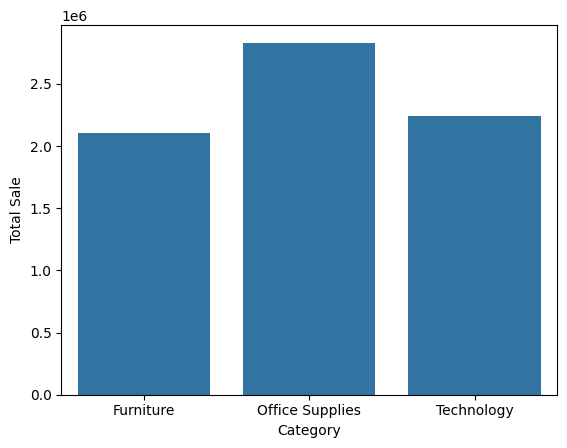

In [13]:
E5=df.groupby('Category')['Total Sale'].sum().reset_index()
sns.barplot(x='Category' , y= 'Total Sale' , data=E5)
plt.show()

In [15]:
df['Customer ID'].nunique()

773

In [17]:
df['State'].value_counts().head(3)

State
California    1189
New York       672
Texas          565
Name: count, dtype: int64

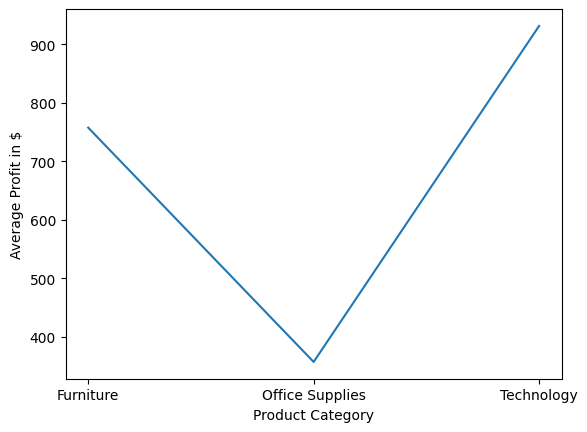

In [19]:
M1=df.groupby('Category')['Profit'].mean().reset_index()
sns.lineplot(x='Category' , y= 'Profit' , data=M1)
plt.xlabel('Product Category')
plt.ylabel('Average Profit in $')
plt.show()

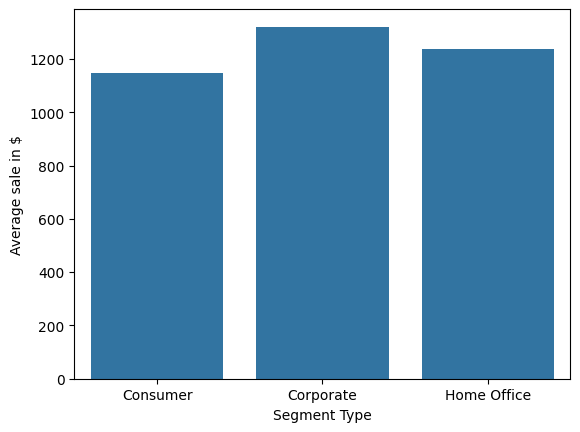

In [20]:
M2=df.groupby('Segment')['Total Sale'].mean().reset_index()
sns.barplot(x='Segment' , y='Total Sale' , data=M2)
plt.xlabel('Segment Type')
plt.ylabel('Average sale in $')
plt.show()

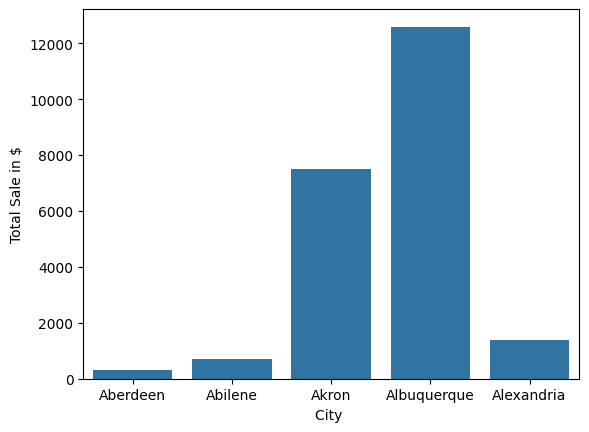

In [22]:
M3=df.groupby('City')['Total Sale'].sum().reset_index().head(5)
sns.barplot(x='City' , y='Total Sale' , data=M3)
plt.xlabel('City ')
plt.ylabel('Total Sale in $')
plt.show()

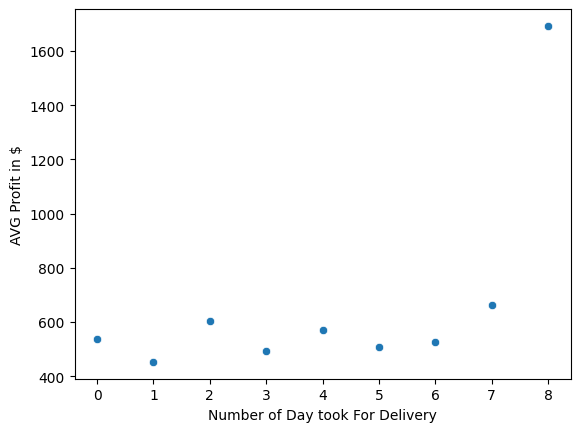

In [24]:
M4=df.groupby('Day For Delivery')['Profit'].mean().reset_index()
sns.scatterplot(x='Day For Delivery' , y='Profit' , data=M4)
plt.xlabel('Number of Day took For Delivery')
plt.ylabel('AVG Profit in $')
plt.show()


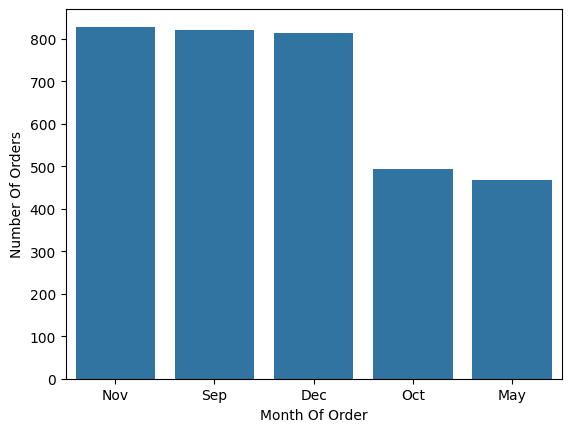

In [26]:
M5 = df.groupby('Order Month')['Order ID'].count().reset_index()
M5 = M5.sort_values(by='Order ID', ascending=False).head(5)
sns.barplot(x='Order Month', y='Order ID', data=M5)
plt.xlabel('Month Of Order')
plt.ylabel('Number Of Orders')
plt.show()


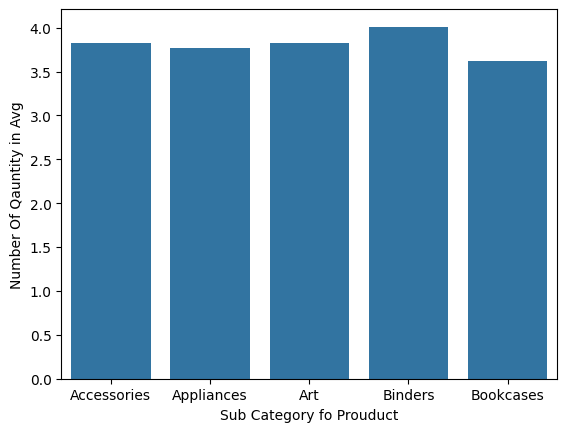

In [27]:
M6=df.groupby('Sub Category')['Quantity'].mean().reset_index().head(5)
sns.barplot(x='Sub Category' , y='Quantity' , data=M6)
plt.xlabel('Sub Category fo Prouduct')
plt.ylabel('Number Of Qauntity in Avg')
plt.show()

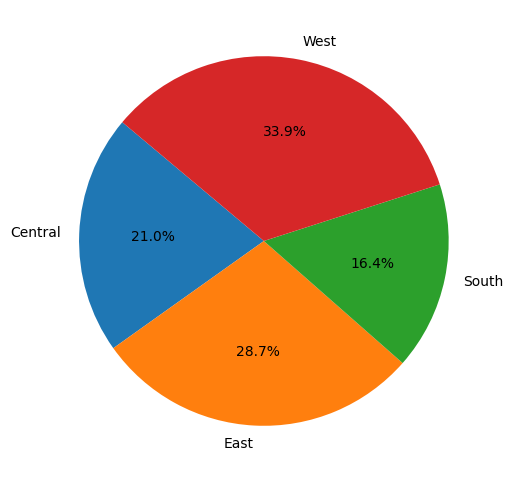

In [28]:
M7 = df.groupby('Region')['Profit'].sum().reset_index()
plt.figure(figsize=(6,6))
plt.pie(M7['Profit'], labels=M7['Region'], autopct='%1.1f%%', startangle=140)
plt.show()


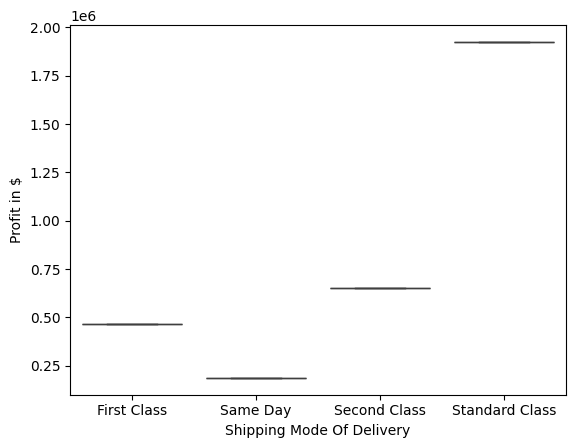

In [29]:
H1=df.groupby('Ship Mode')['Profit'].sum().reset_index()
sns.boxplot(x='Ship Mode', y='Profit' , data=H1)
plt.xlabel('Shipping Mode Of Delivery')
plt.ylabel('Profit in $')
plt.show()

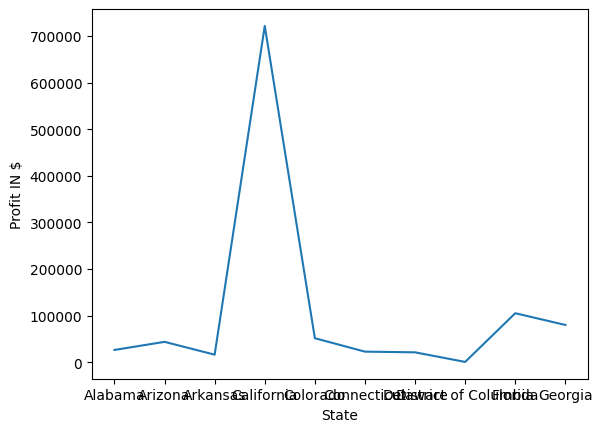

In [33]:
H3=df.groupby('State')['Profit'].sum().reset_index().head(10)
sns.lineplot(x='State' , y='Profit' , data=H3)
plt.ylabel('Profit IN $')
plt.show()


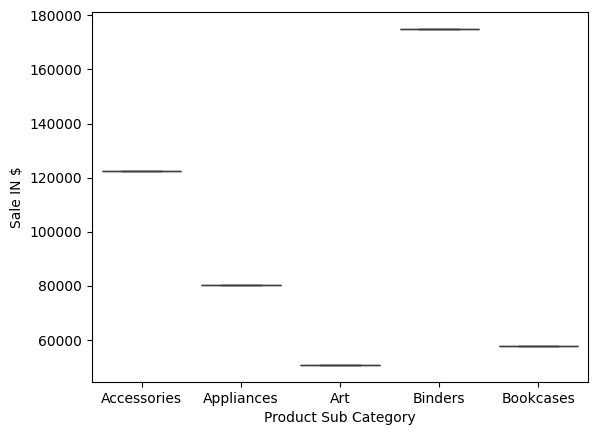

In [39]:
H4=df.groupby('Sub Category')['Sale'].sum().reset_index().head(5)
sns.boxplot(x='Sub Category' , y='Sale' , data=H4)
plt.ylabel('Sale IN $')
plt.xlabel('Product Sub Category')
plt.show()

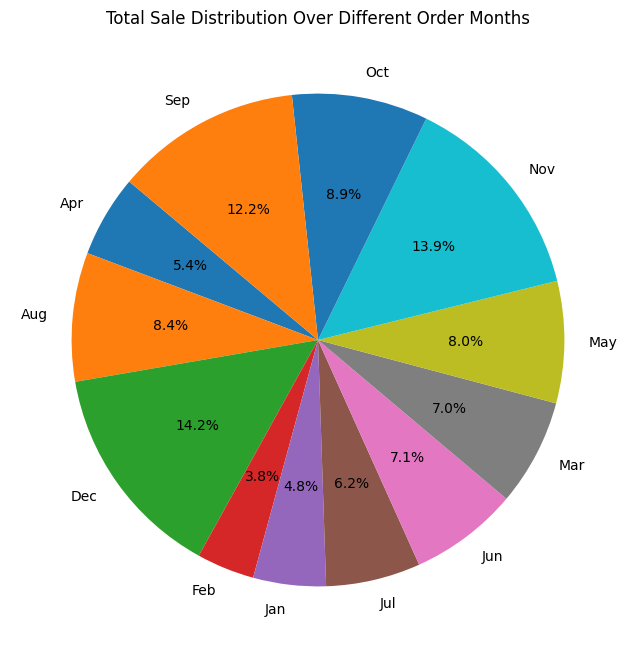

In [36]:
H4 = df.groupby('Order Month')['Total Sale'].sum().reset_index()
plt.figure(figsize=(8,8))
plt.pie(H4['Total Sale'], labels=H4['Order Month'], autopct='%1.1f%%', startangle=140)
plt.title('Total Sale Distribution Over Different Order Months')
plt.show()


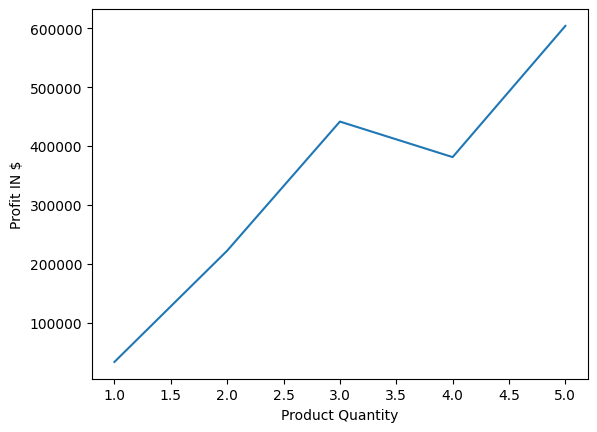

In [38]:
H5=df.groupby('Quantity')['Profit'].sum().reset_index().head(5)
sns.lineplot(x='Quantity' , y='Profit' , data=H5)
plt.ylabel('Profit IN $')
plt.xlabel('Product Quantity')
plt.show()